## Working with Data of Global Indicators – Gapminder
If you have not heard of Gapminder, please follow the following link to check it out. It is the home of a notorious data visualization created some time ago that was actually presented on in a TED Talk. The “Videos” option at the top of homepage is one way to access many of the videos produced about Gapminder.

Check out Gapminder here https://www.gapminder.org/ 

There are multiple options to choose from at the top of the home page, but there are two of particular interest: “Tools” and “Data”.

If you navigate to the “Tools” page first you can play around with the data visualization tool yourself. It’s pretty amazing as it’s REALLY easy to visualize 4+ variables all at once, and to change the variables you want to visualize. Be sure to experiment a little bit before proceeding with this lab.

If you navigate to the “Data” page you’ll notice that all of the data that were available to visualize can be downloaded very easily for free.

# Exercises
1. If you haven’t already done so, create an R Project for our course. From here it should be convenient to navigate to all of our assignments and materials that you organize together.

2. Create a “Data” subfolder and download the q1data.csv, q2data.csv, and q3data.csv files from Canvas to this subfolder.
3. Complete this assignment in an .ipynb file that you will render to HTML using quarto. Use a new theme or other visual customizations of your liking to spice up your submission! Just google “quarto themes” to see all the awesome options that are out there!

4. Unless otherwise specified, you should echo your code for each of your code chunks so that we can see it in your output file.

## Task 1
Below is a plot of a visualization in Gapminder (the default/starting one actually). Look it over and take note of the variables being visualized.

![Task1ss](Lab1Images/task1ss.png) 


1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

    In this visualization, Gapminder is using a buubleplot where they are comparing life expectancy to income. On top of this they are coloring the dots in the bubblelot with colors to represent the region in the world the data is collected from. The size of each "bubble" highlights the number of people that fall under the life expectancy/income relationship. 
    


2. Import the q1data.csv dataset.

In [114]:
import pandas as pd
df = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB544MACHINE/Week1/Lab1Data/q1data.csv")
df

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa



3. Recreate the plot as best you can using plotnine.

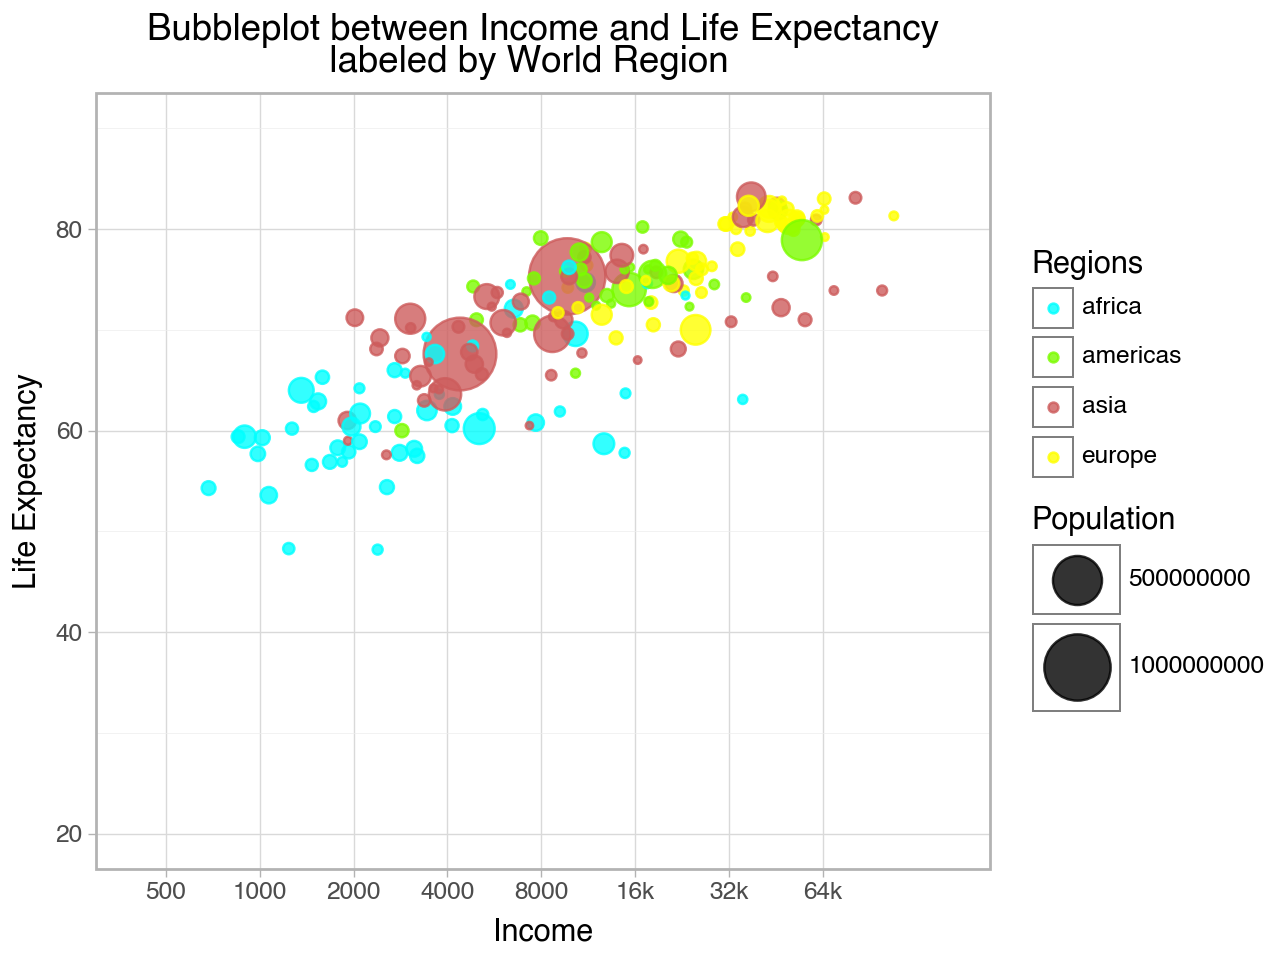

In [115]:
from plotnine import ggplot, aes, geom_point, labs, theme_light, coord_cartesian, scale_color_manual, scale_size_continuous, scale_x_continuous
custom_colors = {
    "americas": "lawngreen",
    "africa": "aqua",
    "europe": "yellow",
    "asia": "indianred"
}
# Ensure numeric columns
df.loc[:, 'income'] = pd.to_numeric(df['income'], errors='coerce')
df.loc[:, 'life_exp'] = pd.to_numeric(df['life_exp'], errors='coerce')
df.loc[:, 'population'] = pd.to_numeric(df['population'], errors='coerce')
# Clean the DataFrame
df_clean = df.dropna(subset=['four_regions', 'income', 'life_exp', 'population'])
df_clean = df_clean[df_clean['income'] > 0]  # Filter out non-positive GDP values

data1Scatter = (
    ggplot(df_clean, aes(x="income", y="life_exp", color="four_regions", size="population")) +
    geom_point(alpha = .8) +
    labs(
        title="Bubbleplot between Income and Life Expectancy\n                  labeled by World Region",
        x="Income",
        y="Life Expectancy",
        color = "Regions",
        size = "Population"
    ) +
    scale_color_manual(values=custom_colors) +
    scale_size_continuous(range=(1, 15)) +
    theme_light() +
    scale_x_continuous(
        trans= 'log',
        breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels = ['500', '1000', '2000', '4000', '8000', '16k', '32k', '64k']
        ) +
    coord_cartesian(xlim=(6, 12), ylim=(20, 90))
)
data1Scatter.show()


4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

    We could use a faceted density plot to show the life expectancy for each region organized by income level. In doing this we are able to get a specialized report of how each region fares within each income level. One thing that the bubble plot does better however, is in it's ability to show an overal positive trend between life expectancy and income for teh toatl population. 


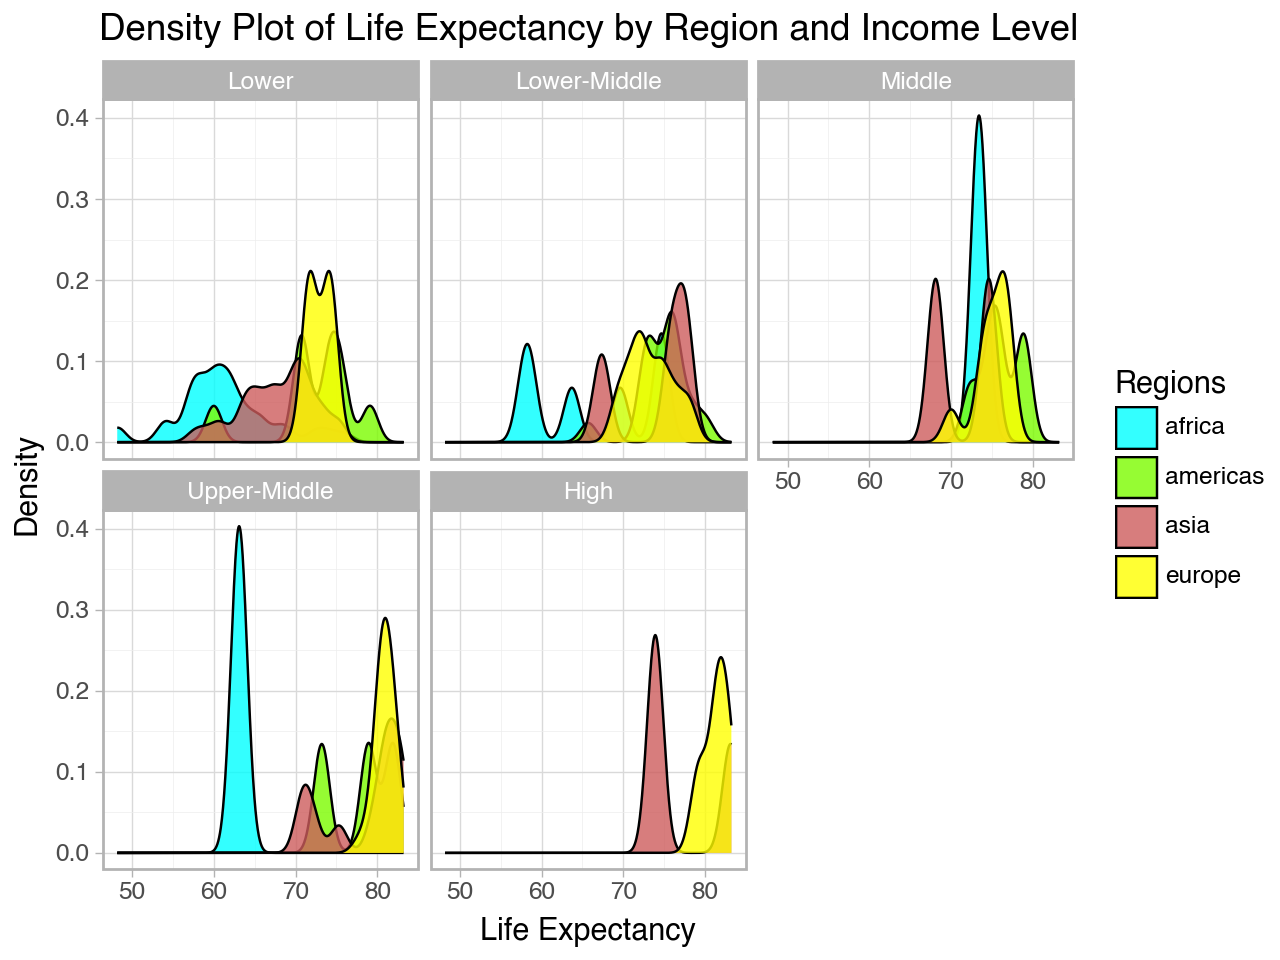

In [116]:
from plotnine import ggplot, aes, geom_density, labs, scale_fill_manual, theme_light, facet_wrap

custom_colors = {
    "americas": "lawngreen",
    "africa": "aqua",
    "europe": "yellow",
    "asia": "indianred"
}

# Create bins for income (you can adjust the bins as needed)
df['income_bins'] = pd.cut(df['income'], bins=[0, 10000, 20000, 30000, 64000, 120000], labels=["Lower", "Lower-Middle", "Middle", "Upper-Middle", "High"])
df = df.dropna(subset=['four_regions', 'income'])

data1Density = (
    ggplot(df, aes(x="life_exp", fill="four_regions")) +
    geom_density(alpha=0.8, bw = .99) +
    labs(
        title="Density Plot of Life Expectancy by Region and Income Level",
        x="Life Expectancy",
        y="Density",
        fill = "Regions"
    ) +
    scale_fill_manual(values=custom_colors) + 
    theme_light() +
    facet_wrap("~ income_bins")) # Facet by income bins

data1Density.show()




## Task 2
Below is another plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.

![Task2ss](Lab1Images/task2ss.png)

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

    In this visualization we are looking at another bubble plot representing the relationship between imports and exports, as a percentage of GDP, for various countries. Then the only variable that can be used to represent the size of the bubbles is the energy level.

2. Import the q2data.csv dataset.


In [124]:
df = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB544MACHINE/Week1/Lab1Data/q2data.csv")
df

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa



3. Recreate the plot as best you can using plotnine.

/var/folders/jl/kkh608tn0k194f6cv0bwbqp80000gn/T/ipykernel_73303/2195550952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 57 rows containing missing values.


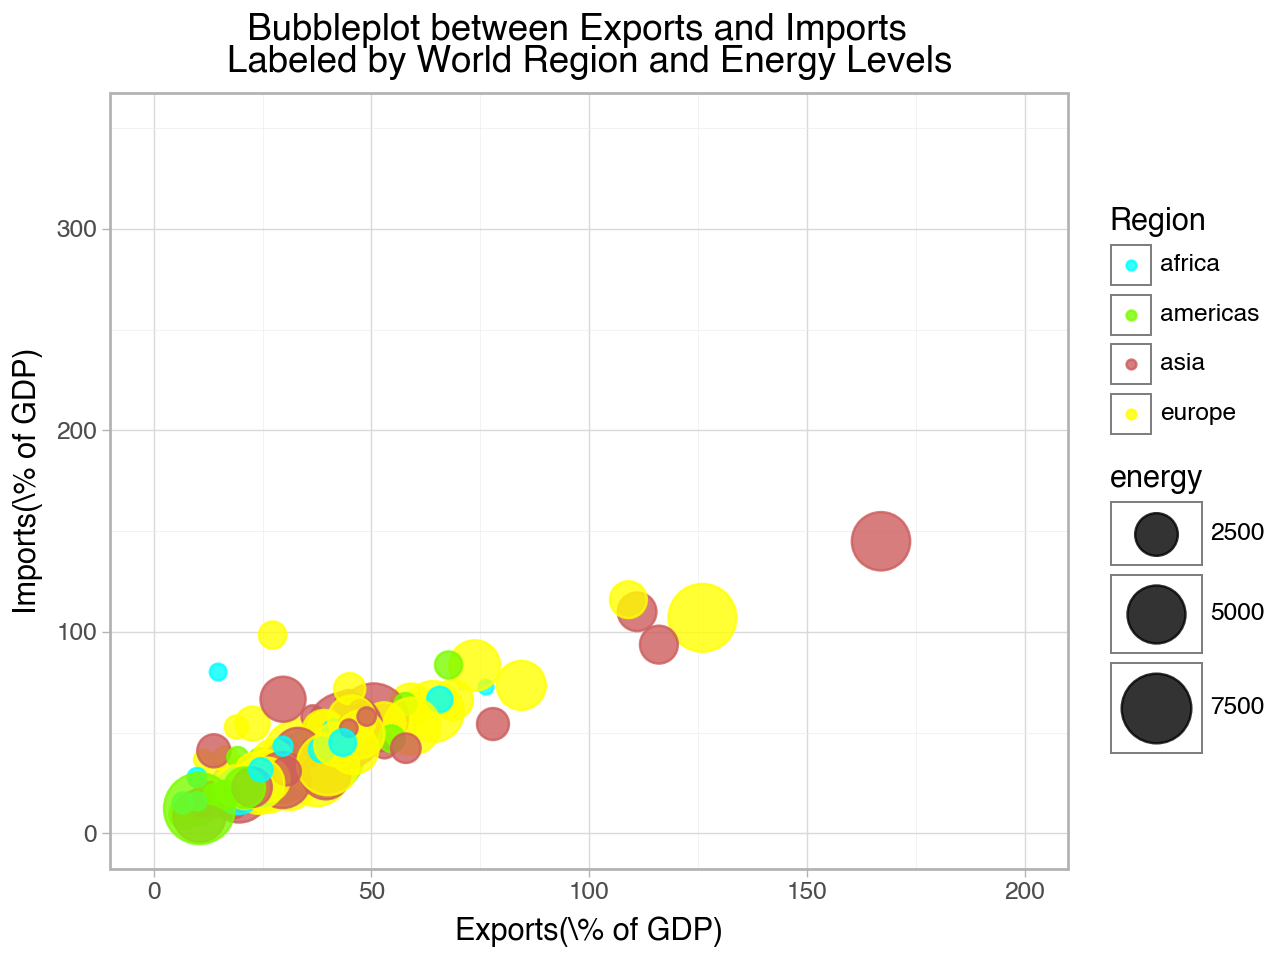

In [129]:
from plotnine import ggplot, aes, geom_point, labs, theme_light, coord_cartesian, scale_color_manual, scale_size_continuous
# Make energy a continuous variable
df["energy"] = pd.to_numeric(df["energy"], errors="coerce") 
custom_colors = {
    "americas": "lawngreen",
    "africa": "aqua",
    "europe": "yellow",
    "asia": "indianred"
}
df = df.dropna(subset=['four_regions'])
data2Scatter = (
    ggplot(df, aes(x="exports", y="imports", color="four_regions", size="energy")) +
    geom_point(alpha = .8) +
    labs(
        title="  Bubbleplot between Exports and Imports\nLabeled by World Region and Energy Levels",
        x="Exports(\% of GDP)",
        y="Imports(\% of GDP)",
        fill="Energy",
        color="Region"
    ) +
    scale_color_manual(values=custom_colors) +
    scale_size_continuous(range=(1, 15)) +
    theme_light() +
    coord_cartesian(xlim=(0, 200), ylim=(0, 350))
);

data2Scatter.show()


4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

    We could also use a boxplot to visualize the data. In the boxplot we get a clear distribution of the relationship between imports and exports. We can also clearly see outliers similar to geom_point, however now can see how displaced they are from the quartile range. This plot tells us nothing however, about tehe trend of the population, which is highlighted well in the bubble plot. 

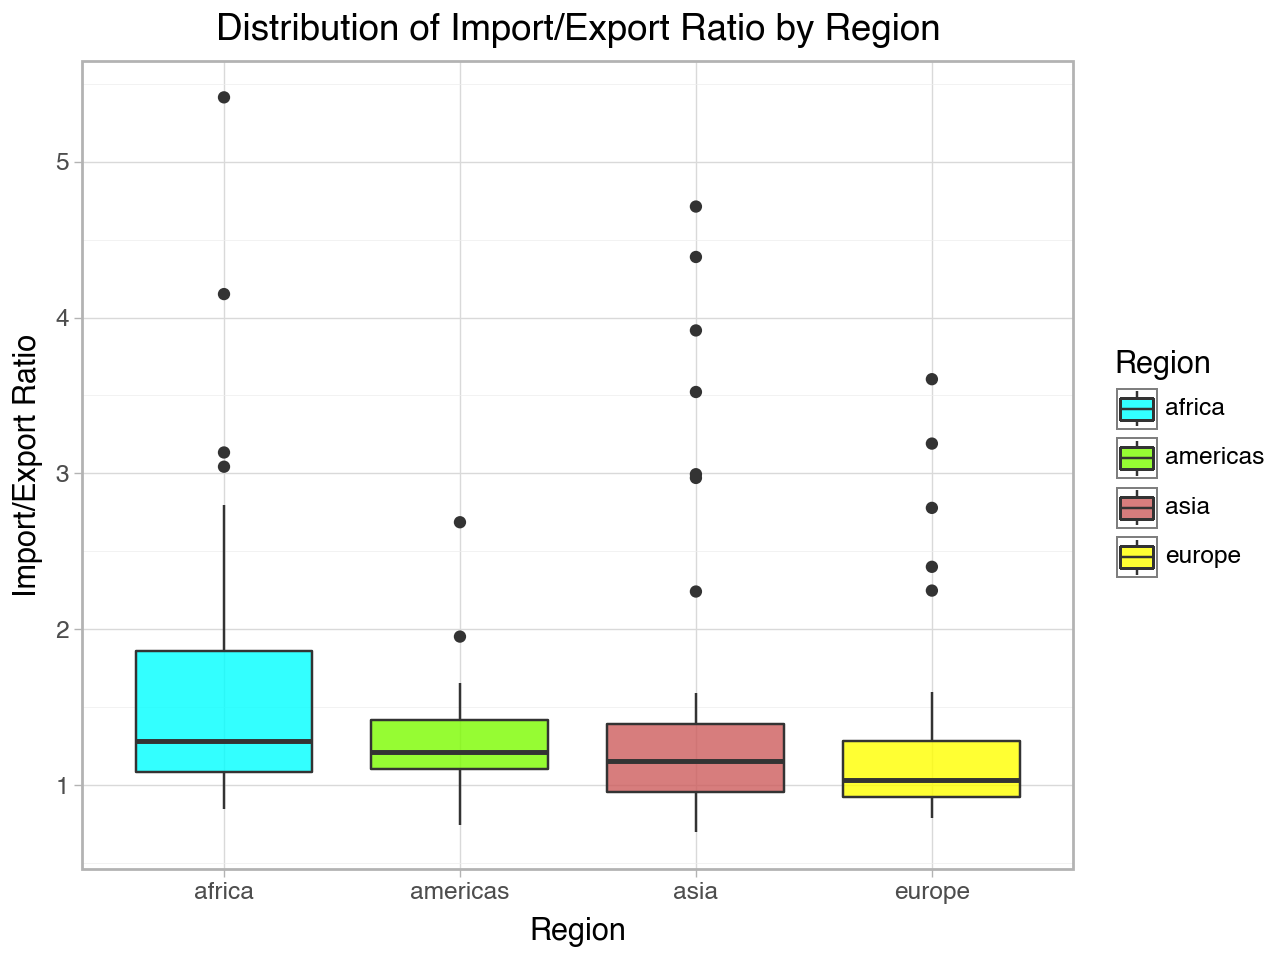

In [132]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme_light
import numpy as np

df['import_export_ratio'] = df['imports'] / df['exports']
df = df.copy()
df.loc[df['import_export_ratio'] == np.inf, 'import_export_ratio'] = np.nan
df = df.loc[~df['import_export_ratio'].isna()]

# Create a box plot of the import/export ratio by region
box_plot = (
    ggplot(df, aes(x='four_regions', y='import_export_ratio', fill='four_regions')) +
    geom_boxplot(alpha=.8) +
    labs(
        title="Distribution of Import/Export Ratio by Region",
        x="Region",
        y="Import/Export Ratio",
        fill="Region"
    ) +
    scale_fill_manual(values=custom_colors) +
    theme_light()
)

box_plot.show()



## Task 3
Below is a final plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.

![Task3ss](Lab1Images/task3ss.png)

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

    In this visualization it is comparing, with a bubble plot, the countries GDP per capita to the number of internet users. Then each "bubble" is sized based on the income of the country and colored by its region. 

2. Import the q3data.csv dataset.

In [120]:
df = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB544MACHINE/Week1/Lab1Data/q3data.csv")
df

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa



3. Recreate the plot as best you can using plotnine.

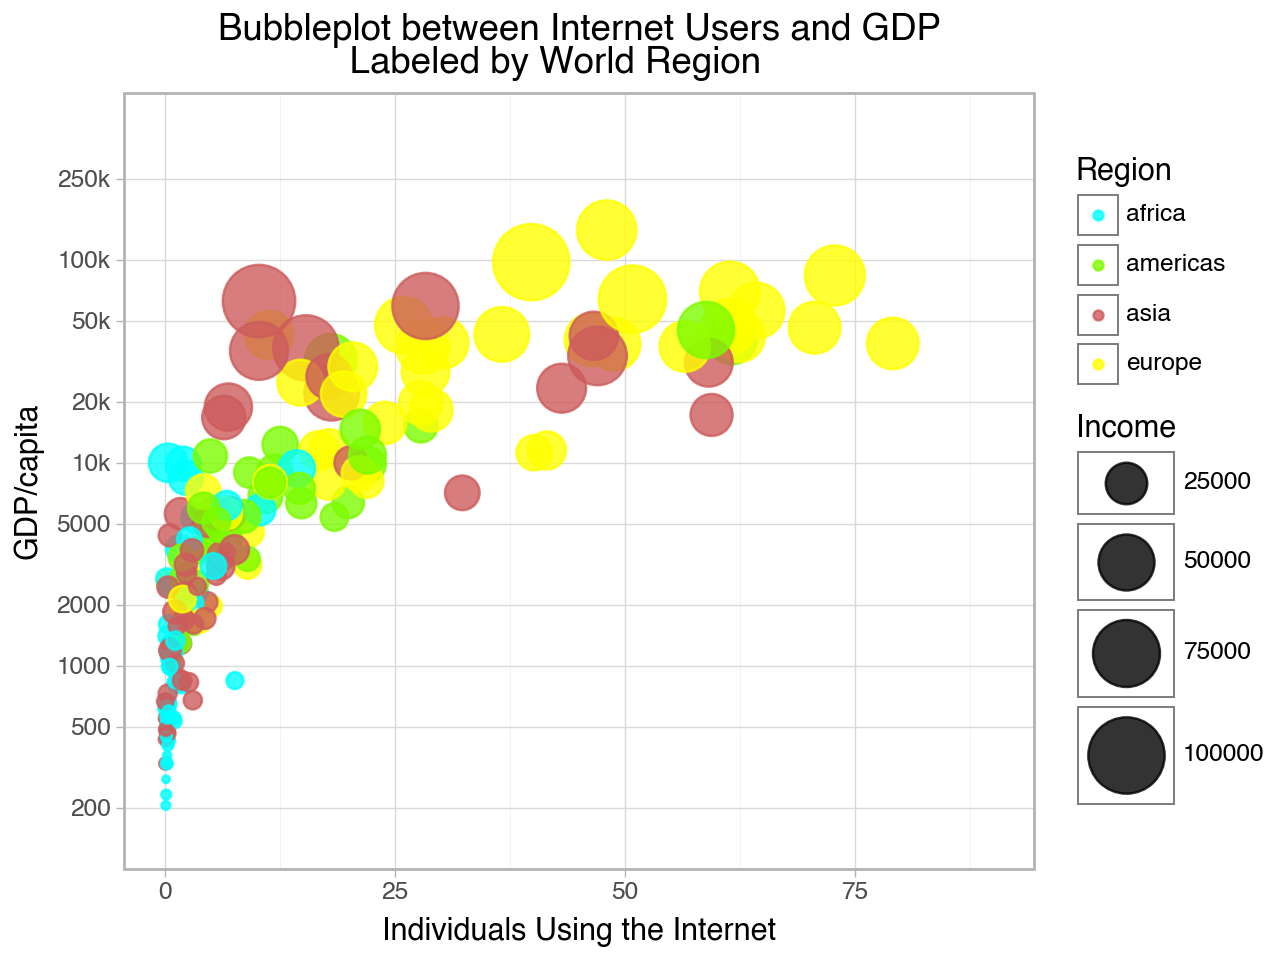

In [121]:
from plotnine import ggplot, aes, geom_point, labs, theme_light, coord_cartesian, scale_color_manual, scale_size_continuous, scale_y_continuous

custom_colors = {
    "americas": "lawngreen",
    "africa": "aqua",
    "europe": "yellow",
    "asia": "indianred"
}

# Ensure numeric columns
df.loc[:, 'income'] = pd.to_numeric(df['income'], errors='coerce')
df.loc[:, 'internet_users'] = pd.to_numeric(df['internet_users'], errors='coerce')
df.loc[:, 'gdp'] = pd.to_numeric(df['gdp'], errors='coerce')
# Clean the DataFrame
df_clean = df.dropna(subset=['four_regions', 'income', 'internet_users', 'gdp'])
df_clean = df_clean[df_clean['gdp'] > 0]  # Filter out non-positive GDP values


data3Scatter = (
    ggplot(df_clean, aes(x="internet_users", y="gdp", color="four_regions", size="income")) +
    geom_point(alpha= .8) +
    labs(
        title="Bubbleplot between Internet Users and GDP\n             Labeled by World Region",
        x="Individuals Using the Internet",
        y="GDP/capita",
        size="Income",
        color="Region"
    ) +
    scale_color_manual(values=custom_colors) +
    scale_size_continuous(range=(1, 15)) +
    scale_y_continuous(
        trans= 'log',
        breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 250000], 
        labels=['200', '500', '1000', '2000', '5000', '10k', '20k', '50k', '100k', '250k']
        ) +
    theme_light() +
    coord_cartesian(xlim=(0, 90), ylim=(5, 13))
);
data3Scatter.show()

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

    We can use a bar graph to identify a couple trends. One trend we can see is how GDP increases as internet usage increases up to a certain level where it no longer seems to be a factor. Another trend we can see is how each world region stands in terms of this relationship. We can see this second relationship in the original plot as well.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_stack requires non-overlapping x intervals


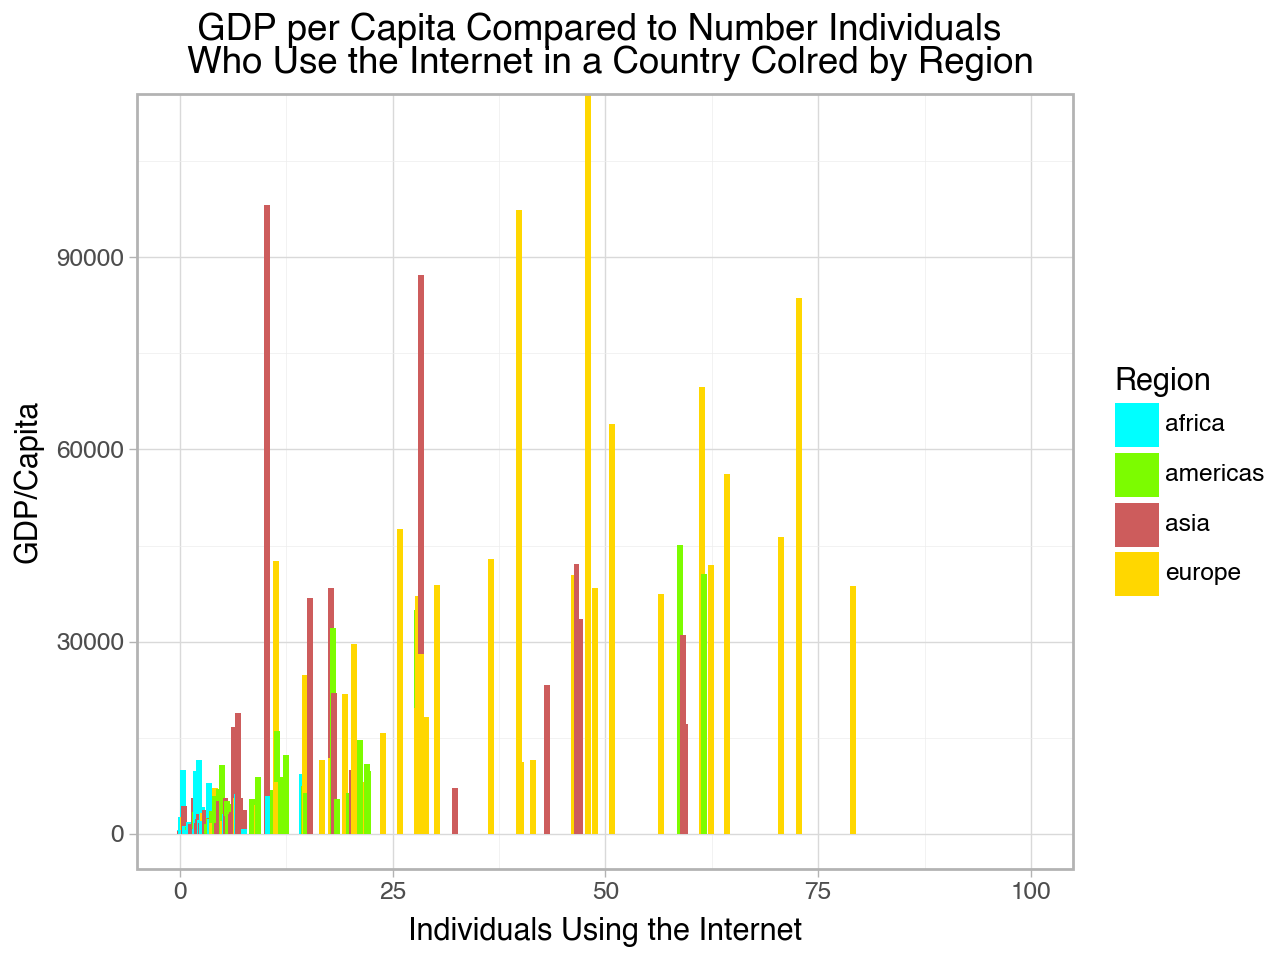

In [133]:
from plotnine import ggplot, geom_bar, labs, theme_light

custom_colors = {
    "americas": "lawngreen",
    "africa": "aqua",
    "europe": "gold",
    "asia": "indianred"
}

data3bar = (
    ggplot(df_clean, aes(x='internet_users', y='gdp', fill= 'four_regions')) +
    geom_bar(stat='identity', width= .7) +
    labs(title="  GDP per Capita Compared to Number Individuals \n Who Use the Internet in a Country Colred by Region",
         x="Individuals Using the Internet",
         y="GDP/Capita",
         fill= "Region") +
    theme_light() +
    scale_fill_manual(values=custom_colors) +
    coord_cartesian(xlim=(0, 100), ylim=(0, 110000))
    ) 

data3bar.show()
